# ЛР №3

Вариант 5
Студент: Геворкян Д.Ф.

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

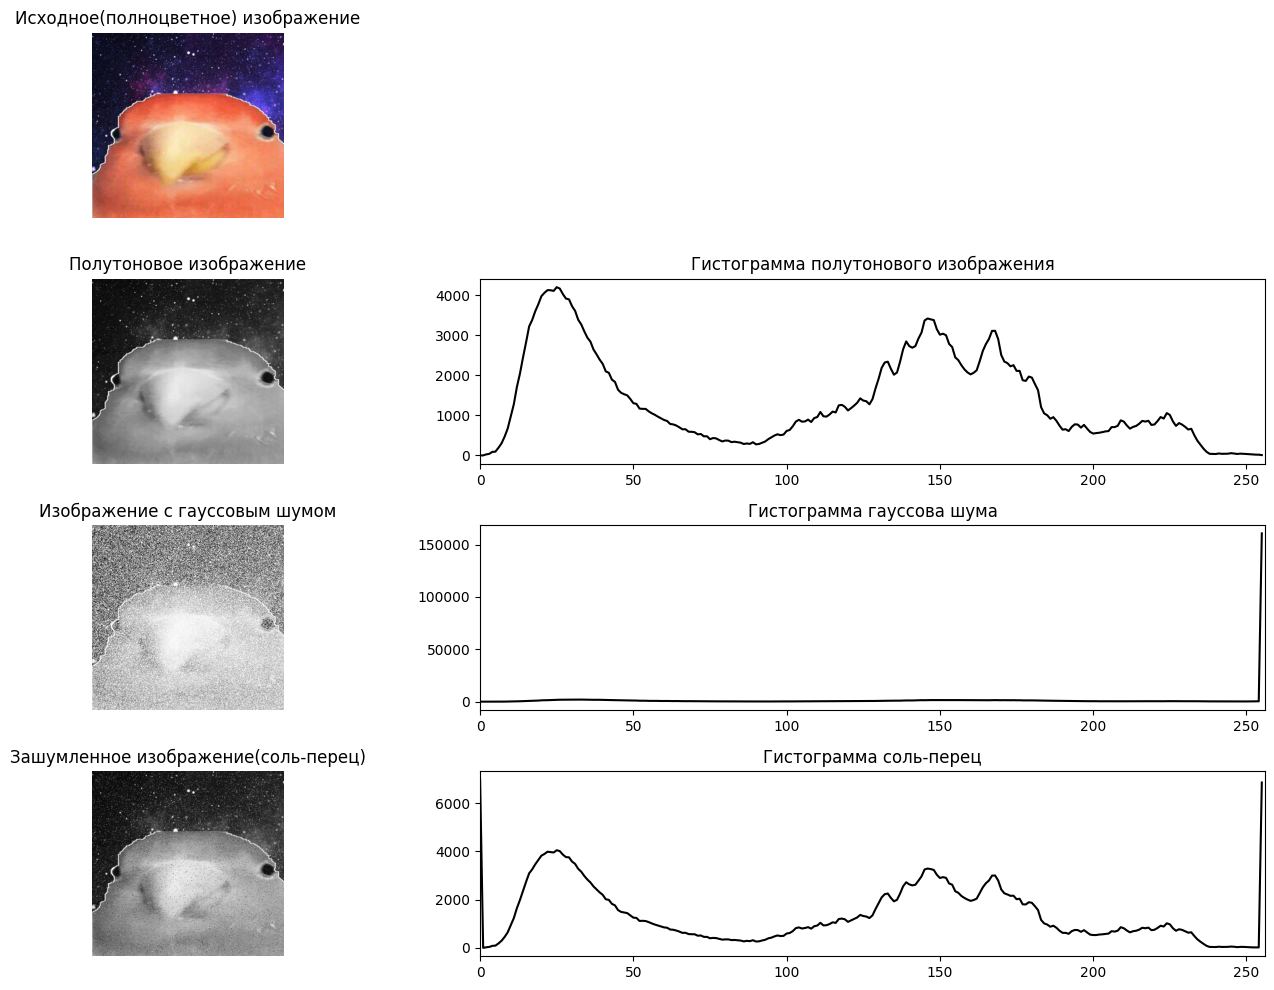

In [4]:
image = cv2.imread('pepuk.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Гауссов шум
mean = 0
var = 100
sigma = var ** 0.5
gaussian = np.random.normal(mean, sigma, gray_image.shape).reshape(gray_image.shape)
noisy_gaussian = cv2.add(gray_image, gaussian.astype(np.uint8))

s_vs_p = 0.5  # соотношение соли и перца
amount = 0.04  # общая доля зашумленных пикселей
noisy_salt_pepper = np.copy(gray_image)

num_salt = np.ceil(amount * gray_image.size * s_vs_p).astype(int)
salt_coords = tuple(
    [np.random.randint(0, dim, num_salt) for dim in gray_image.shape]
)
noisy_salt_pepper[salt_coords] = 255

num_pepper = np.ceil(amount * gray_image.size * (1. - s_vs_p)).astype(int)
pepper_coords = tuple(
    [np.random.randint(0, dim, num_pepper) for dim in gray_image.shape]
)
noisy_salt_pepper[pepper_coords] = 0

hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_gaussian = cv2.calcHist([noisy_gaussian], [0], None, [256], [0, 256])
hist_salt_pepper = cv2.calcHist([noisy_salt_pepper], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 10))

plt.subplot(4, 2, 1)
plt.imshow(image_rgb)
plt.title('Исходное(полноцветное) изображение')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.axis('off')

plt.subplot(4, 2, 3)
plt.imshow(gray_image, cmap='gray')
plt.title('Полутоновое изображение')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.plot(hist_gray, color='black')
plt.title('Гистограмма полутонового изображения')
plt.xlim([0, 256])

plt.subplot(4, 2, 5)
plt.imshow(noisy_gaussian, cmap='gray')
plt.title('Изображение с гауссовым шумом')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.plot(hist_gaussian, color='black')
plt.title('Гистограмма гауссова шума')
plt.xlim([0, 256])

plt.subplot(4, 2, 7)
plt.imshow(noisy_salt_pepper, cmap='gray')
plt.title('Зашумленное изображение(соль-перец)')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.plot(hist_salt_pepper, color='black')
plt.title('Гистограмма соль-перец')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

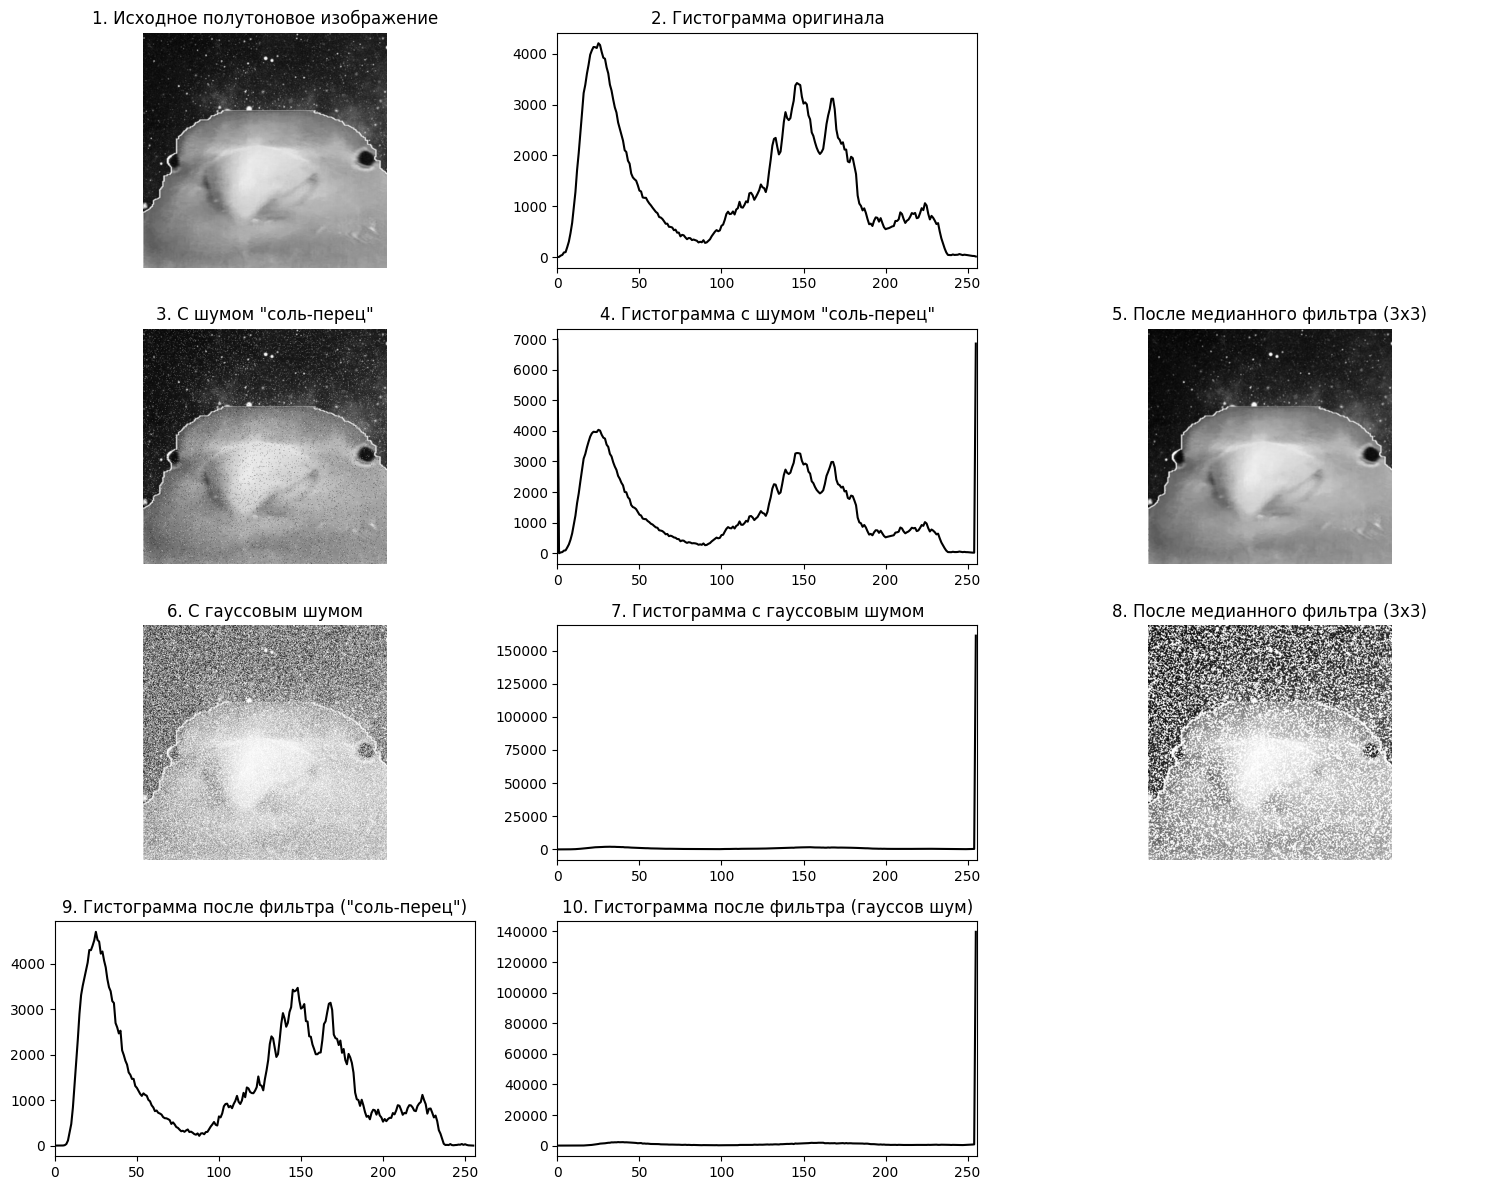

In [6]:
image = cv2.imread('pepuk.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Преобразование в полутоновое изображение
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Добавление гауссова шума
mean = 0
var = 100
sigma = var ** 0.5
gaussian = np.random.normal(mean, sigma, gray_image.shape).reshape(gray_image.shape)
noisy_gaussian = cv2.add(gray_image, gaussian.astype(np.uint8))

# Добавление шума "соль-перец"
s_vs_p = 0.5  # соотношение соли и перца
amount = 0.04  # доля зашумленных пикселей
noisy_salt_pepper = np.copy(gray_image)

# Добавление "соли" (белые точки)
num_salt = np.ceil(amount * gray_image.size * s_vs_p).astype(int)
salt_coords = tuple([np.random.randint(0, dim, num_salt) for dim in gray_image.shape])
noisy_salt_pepper[salt_coords] = 255

# Добавление "перца" (черные точки)
num_pepper = np.ceil(amount * gray_image.size * (1. - s_vs_p)).astype(int)
pepper_coords = tuple([np.random.randint(0, dim, num_pepper) for dim in gray_image.shape])
noisy_salt_pepper[pepper_coords] = 0

# Применение медианного фильтра 3x3
median_filtered_salt_pepper = cv2.medianBlur(noisy_salt_pepper, 3)
median_filtered_gaussian = cv2.medianBlur(noisy_gaussian, 3)

# Создание гистограмм
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_salt_pepper = cv2.calcHist([noisy_salt_pepper], [0], None, [256], [0, 256])
hist_gaussian = cv2.calcHist([noisy_gaussian], [0], None, [256], [0, 256])
hist_median_sp = cv2.calcHist([median_filtered_salt_pepper], [0], None, [256], [0, 256])
hist_median_gauss = cv2.calcHist([median_filtered_gaussian], [0], None, [256], [0, 256])

# Настройка графиков
plt.figure(figsize=(15, 12))

# 1. Оригинальное полутоновое изображение
plt.subplot(4, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('1. Исходное полутоновое изображение')
plt.axis('off')

# 2. Гистограмма оригинала
plt.subplot(4, 3, 2)
plt.plot(hist_gray, color='black')
plt.title('2. Гистограмма оригинала')
plt.xlim([0, 256])

# 3. Пустое место (для выравнивания)
plt.subplot(4, 3, 3)
plt.axis('off')

# 4. Изображение с шумом "соль-перец"
plt.subplot(4, 3, 4)
plt.imshow(noisy_salt_pepper, cmap='gray')
plt.title('3. С шумом "соль-перец"')
plt.axis('off')

# 5. Гистограмма с шумом "соль-перец"
plt.subplot(4, 3, 5)
plt.plot(hist_salt_pepper, color='black')
plt.title('4. Гистограмма с шумом "соль-перец"')
plt.xlim([0, 256])

# 6. Результат медианной фильтрации ("соль-перец")
plt.subplot(4, 3, 6)
plt.imshow(median_filtered_salt_pepper, cmap='gray')
plt.title('5. После медианного фильтра (3x3)')
plt.axis('off')

# 7. Изображение с гауссовым шумом
plt.subplot(4, 3, 7)
plt.imshow(noisy_gaussian, cmap='gray')
plt.title('6. С гауссовым шумом')
plt.axis('off')

# 8. Гистограмма с гауссовым шумом
plt.subplot(4, 3, 8)
plt.plot(hist_gaussian, color='black')
plt.title('7. Гистограмма с гауссовым шумом')
plt.xlim([0, 256])

# 9. Результат медианной фильтрации (гауссов шум)
plt.subplot(4, 3, 9)
plt.imshow(median_filtered_gaussian, cmap='gray')
plt.title('8. После медианного фильтра (3x3)')
plt.axis('off')

# 10. Гистограмма после фильтра ("соль-перец")
plt.subplot(4, 3, 10)
plt.plot(hist_median_sp, color='black')
plt.title('9. Гистограмма после фильтра ("соль-перец")')
plt.xlim([0, 256])

# 11. Гистограмма после фильтра (гауссов шум)
plt.subplot(4, 3, 11)
plt.plot(hist_median_gauss, color='black')
plt.title('10. Гистограмма после фильтра (гауссов шум)')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

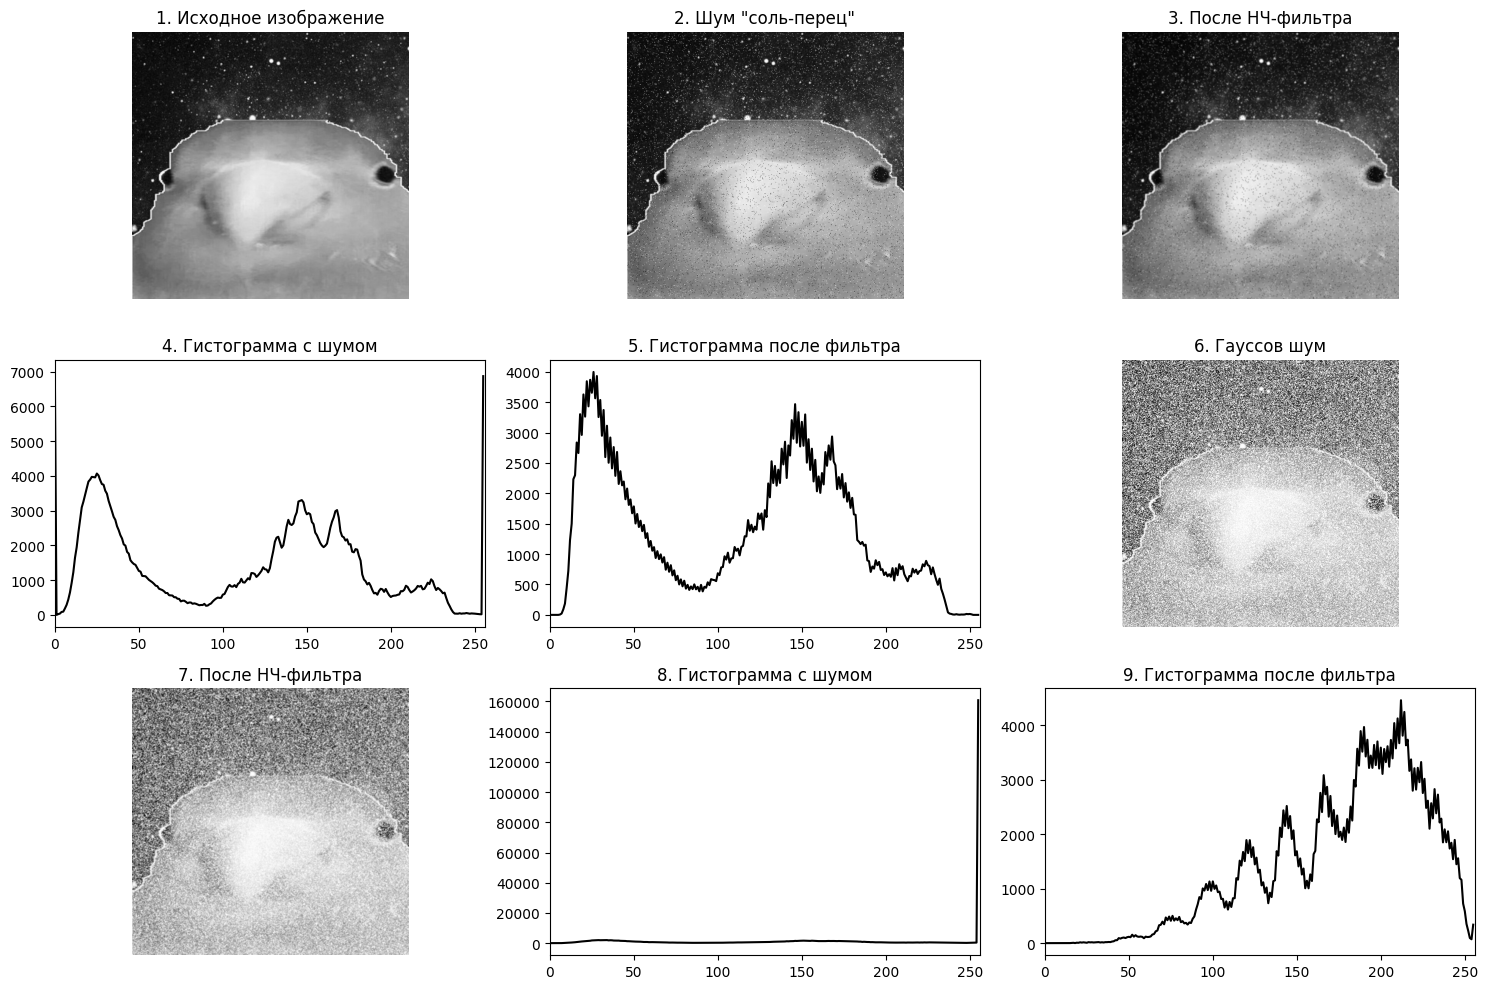

In [7]:
image = cv2.imread('pepuk.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Создание шумов (код из предыдущих заданий)
# Гауссов шум
mean, var = 0, 100
sigma = var ** 0.5
gaussian = np.random.normal(mean, sigma, gray_image.shape).reshape(gray_image.shape)
noisy_gaussian = cv2.add(gray_image, gaussian.astype(np.uint8))

# Шум "соль-перец"
s_vs_p, amount = 0.5, 0.04
noisy_salt_pepper = np.copy(gray_image)
num_salt = np.ceil(amount * gray_image.size * s_vs_p).astype(int)
salt_coords = tuple([np.random.randint(0, dim, num_salt) for dim in gray_image.shape])
noisy_salt_pepper[salt_coords] = 255
num_pepper = np.ceil(amount * gray_image.size * (1. - s_vs_p)).astype(int)
pepper_coords = tuple([np.random.randint(0, dim, num_pepper) for dim in gray_image.shape])
noisy_salt_pepper[pepper_coords] = 0

# Заданный НЧ-фильтр 3x3
kernel = np.array([
    [1, 1, 1],
    [1, 2, 1],
    [1, 1, 1]
], dtype=np.float32) / 10  # Нормировка

# Применение фильтра
filtered_salt_pepper = cv2.filter2D(noisy_salt_pepper, -1, kernel)
filtered_gaussian = cv2.filter2D(noisy_gaussian, -1, kernel)

# Создание гистограмм
hist_original = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_sp = cv2.calcHist([noisy_salt_pepper], [0], None, [256], [0, 256])
hist_gauss = cv2.calcHist([noisy_gaussian], [0], None, [256], [0, 256])
hist_filtered_sp = cv2.calcHist([filtered_salt_pepper], [0], None, [256], [0, 256])
hist_filtered_gauss = cv2.calcHist([filtered_gaussian], [0], None, [256], [0, 256])

# Отображение результатов
plt.figure(figsize=(15, 10))

# Исходное изображение
plt.subplot(3, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('1. Исходное изображение')
plt.axis('off')

# С шумом "соль-перец"
plt.subplot(3, 3, 2)
plt.imshow(noisy_salt_pepper, cmap='gray')
plt.title('2. Шум "соль-перец"')
plt.axis('off')

# После НЧ-фильтра ("соль-перец")
plt.subplot(3, 3, 3)
plt.imshow(filtered_salt_pepper, cmap='gray')
plt.title('3. После НЧ-фильтра')
plt.axis('off')

# Гистограмма (соль-перец)
plt.subplot(3, 3, 4)
plt.plot(hist_sp, color='black')
plt.title('4. Гистограмма с шумом')
plt.xlim([0, 256])

# Гистограмма (после фильтра)
plt.subplot(3, 3, 5)
plt.plot(hist_filtered_sp, color='black')
plt.title('5. Гистограмма после фильтра')
plt.xlim([0, 256])

# С гауссовым шумом
plt.subplot(3, 3, 6)
plt.imshow(noisy_gaussian, cmap='gray')
plt.title('6. Гауссов шум')
plt.axis('off')

# После НЧ-фильтра (гауссов шум)
plt.subplot(3, 3, 7)
plt.imshow(filtered_gaussian, cmap='gray')
plt.title('7. После НЧ-фильтра')
plt.axis('off')

# Гистограмма (гауссов шум)
plt.subplot(3, 3, 8)
plt.plot(hist_gauss, color='black')
plt.title('8. Гистограмма с шумом')
plt.xlim([0, 256])

# Гистограмма (после фильтра)
plt.subplot(3, 3, 9)
plt.plot(hist_filtered_gauss, color='black')
plt.title('9. Гистограмма после фильтра')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1064\2417090890.py:71: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_image.ravel(), 256, [0, 256], color='black')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1064\2417090890.py:75: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(sharp_gaussian.ravel(), 256, [0, 256], color='black')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1064\2417090890.py:79: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(sharp_salt_pepper.ravel(), 256, [0, 256], color='black')


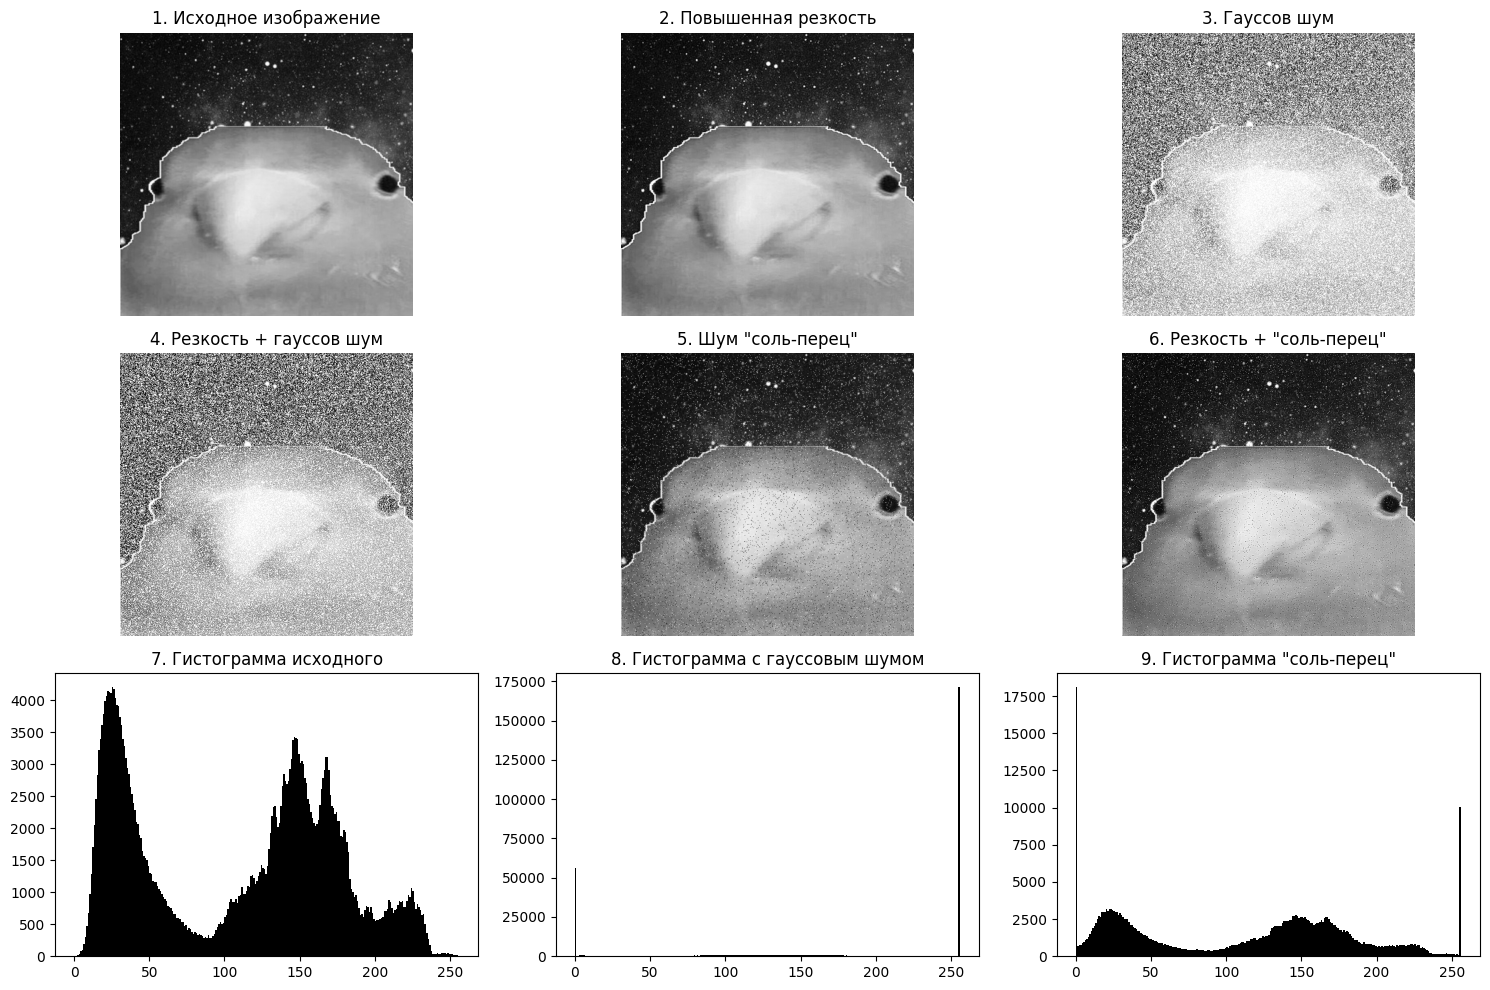

In [10]:
image = cv2.imread('pepuk.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Создание зашумленных изображений
# Гауссов шум
gaussian_noise = np.random.normal(0, 20, gray_image.shape).astype(np.uint8)
noisy_gaussian = cv2.add(gray_image, gaussian_noise)

# Шум "соль-перец"
noisy_salt_pepper = np.copy(gray_image)
salt_pepper_prob = 0.05
salt = np.random.rand(*gray_image.shape) < salt_pepper_prob/2
pepper = np.random.rand(*gray_image.shape) < salt_pepper_prob/2
noisy_salt_pepper[salt] = 255
noisy_salt_pepper[pepper] = 0

# Выбор ядра лапласиана (оба варианта дают аналогичный результат)
laplacian_kernel = np.array([[1, 1, 1],
                             [1, -8, 1],
                             [1, 1, 1]], dtype=np.float32) / 10

# Функция для повышения резкости
def sharpen_image(img, kernel, alpha=1.0):
    laplacian = cv2.filter2D(img, cv2.CV_32F, kernel)
    sharpened = img - alpha * laplacian
    return np.clip(sharpened, 0, 255).astype(np.uint8)

# Применение фильтра ко всем изображениям
sharp_original = sharpen_image(gray_image, laplacian_kernel)
sharp_gaussian = sharpen_image(noisy_gaussian, laplacian_kernel)
sharp_salt_pepper = sharpen_image(noisy_salt_pepper, laplacian_kernel)

# Создание графиков
plt.figure(figsize=(15, 10))

# Исходное изображение
plt.subplot(3, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('1. Исходное изображение')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(sharp_original, cmap='gray')
plt.title('2. Повышенная резкость')
plt.axis('off')

# Гауссов шум
plt.subplot(3, 3, 3)
plt.imshow(noisy_gaussian, cmap='gray')
plt.title('3. Гауссов шум')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(sharp_gaussian, cmap='gray')
plt.title('4. Резкость + гауссов шум')
plt.axis('off')

# Шум "соль-перец"
plt.subplot(3, 3, 5)
plt.imshow(noisy_salt_pepper, cmap='gray')
plt.title('5. Шум "соль-перец"')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(sharp_salt_pepper, cmap='gray')
plt.title('6. Резкость + "соль-перец"')
plt.axis('off')

# Гистограммы
plt.subplot(3, 3, 7)
plt.hist(gray_image.ravel(), 256, [0, 256], color='black')
plt.title('7. Гистограмма исходного')

plt.subplot(3, 3, 8)
plt.hist(sharp_gaussian.ravel(), 256, [0, 256], color='black')
plt.title('8. Гистограмма с гауссовым шумом')

plt.subplot(3, 3, 9)
plt.hist(sharp_salt_pepper.ravel(), 256, [0, 256], color='black')
plt.title('9. Гистограмма "соль-перец"')

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1064\3372735181.py:105: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.ravel(), 256, [0, 256], color='black')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1064\3372735181.py:109: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(noisy_image.ravel(), 256, [0, 256], color='black')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1064\3372735181.py:113: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(sharp_original.ravel(), 256, [0, 256], color='black')


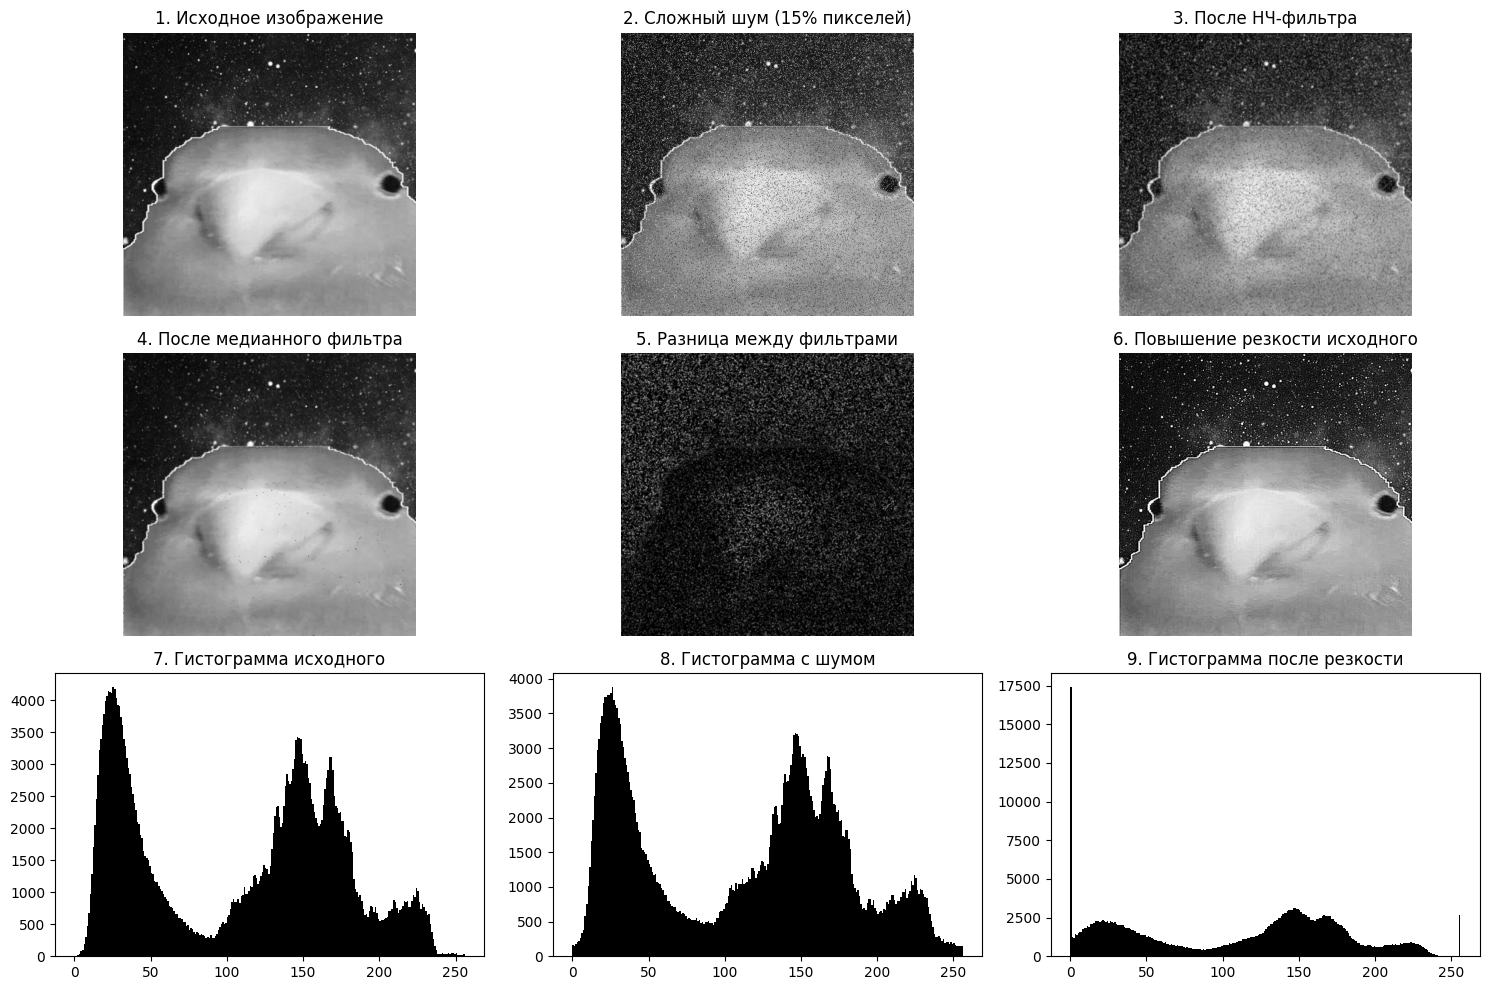

In [43]:
# 1. Функция добавления сложного шума
def add_complex_noise(image, noise_percent=0.15):
    noisy_image = image.copy()
    h, w = image.shape
    num_pixels = int(h * w * noise_percent)

    for _ in range(num_pixels):
        y, x = random.randint(0, h - 1), random.randint(0, w - 1)
        choice = random.choice([1, 2, 3])

        if choice == 1:  # Негатив
            noisy_image[y, x] = 255 - noisy_image[y, x]
        elif choice == 2:  # Сдвиг на половину шкалы
            noisy_image[y, x] = np.uint8((int(noisy_image[y, x]) + 128) % 256)
        else:  # Случайное значение
            noisy_image[y, x] = random.randint(0, 255)

    return noisy_image


# 2. Функции фильтрации
def low_pass_filter(image):
    kernel = np.array([
        [1, 1, 1],
        [1, 2, 1],
        [1, 1, 1]
    ], dtype=np.float32) / 10
    return cv2.filter2D(image, -1, kernel)

def median_filter(image):
    return cv2.medianBlur(image, 3)

# 3. Функция повышения резкости
def sharpen_image(image):
    image_f32 = image.astype(np.float32)
    laplacian_kernel = np.array([
        [1, 1, 1],
        [1, -8, 1],
        [1, 1, 1]
    ], dtype=np.float32)
    laplacian = cv2.filter2D(image_f32, -1, laplacian_kernel)
    sharpened = image_f32 - 0.5 * laplacian
    return np.clip(sharpened, 0, 255).astype(np.uint8)

# Основная программа
def main():
    image = cv2.imread('pepuk.jpg', cv2.IMREAD_GRAYSCALE)

    # Добавление шума
    noisy_image = add_complex_noise(image)

    # Фильтрация
    lpf_filtered = low_pass_filter(noisy_image)
    median_filtered = median_filter(noisy_image)

    # Повышение резкости исходного
    sharp_original = sharpen_image(image)

    plt.figure(figsize=(15, 10))

    # Исходное изображение
    plt.subplot(3, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('1. Исходное изображение')
    plt.axis('off')

    # Зашумленное изображение
    plt.subplot(3, 3, 2)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('2. Сложный шум (15% пикселей)')
    plt.axis('off')

    # НЧ-фильтр
    plt.subplot(3, 3, 3)
    plt.imshow(lpf_filtered, cmap='gray')
    plt.title('3. После НЧ-фильтра')
    plt.axis('off')

    # Медианный фильтр
    plt.subplot(3, 3, 4)
    plt.imshow(median_filtered, cmap='gray')
    plt.title('4. После медианного фильтра')
    plt.axis('off')

    # Разница между фильтрами
    diff = cv2.absdiff(lpf_filtered, median_filtered)
    plt.subplot(3, 3, 5)
    plt.imshow(diff, cmap='gray')
    plt.title('5. Разница между фильтрами')
    plt.axis('off')

    # Повышение резкости исходного
    plt.subplot(3, 3, 6)
    plt.imshow(sharp_original, cmap='gray')
    plt.title('6. Повышение резкости исходного')
    plt.axis('off')

    plt.subplot(3, 3, 7)
    plt.hist(image.ravel(), 256, [0, 256], color='black')
    plt.title('7. Гистограмма исходного')

    plt.subplot(3, 3, 8)
    plt.hist(noisy_image.ravel(), 256, [0, 256], color='black')
    plt.title('8. Гистограмма с шумом')

    plt.subplot(3, 3, 9)
    plt.hist(sharp_original.ravel(), 256, [0, 256], color='black')
    plt.title('9. Гистограмма после резкости')

    plt.tight_layout()
    plt.show()

main()